# Importing libraries 

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm, skew, kurtosis
from sklearn.impute import SimpleImputer

# Importing CSV data

In [62]:
data = pd.read_csv('../datasets/weather.csv', header=0)
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Get the dataframe's basic info

In [63]:
# info() will give you :
    # Number of entries (rows) in the dataframe
    # Column names and number of non-null values in each column along with data types
    # The memory usage of the data frame with a summary of datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# Data Querying (DQL)

### 1. Select data from dataframe using column name

In [64]:
# Query a single row
print('\nQUERYING A SINGLE ROW')
print(data['Temperature (C)'].head(5))

# Query multiple rows
print('\nQUERYING MULTIPLE ROWS')
print(data[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']].head(5))


QUERYING A SINGLE ROW
0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

QUERYING MULTIPLE ROWS
   Temperature (C)  Humidity  Wind Speed (km/h)
0         9.472222      0.89            14.1197
1         9.355556      0.86            14.2646
2         9.377778      0.89             3.9284
3         8.288889      0.83            14.1036
4         8.755556      0.83            11.0446


### 2. Select data from dataframe using condition

In [65]:
# What is a boolean mask - an array of only True or False
condition = data['Humidity'] >= 0.89
print(condition.head(5))

0     True
1    False
2     True
3    False
4    False
Name: Humidity, dtype: bool


In [66]:
# We can pass this boolean mask as dataframe indices to return all the rows that satisfies the condition
print('ALL ROWS SATISFYING HUMIDITY GREATER THAN OR EQUALS 0.89')
data[condition].head(5)

ALL ROWS SATISFYING HUMIDITY GREATER THAN OR EQUALS 0.89


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
52,2006-04-11 04:00:00.000 +0200,Overcast,rain,11.183333,11.183333,0.89,11.2056,180.0,9.9015,0.0,1006.73,Foggy in the evening.


In [67]:
# Using range condition - get all rows with temperature between 10 to 20 degrees celcius
condition = data['Temperature (C)'].between(10.0, 20.0)

print('ALL ROWS WHERE TEMPERATURE (C) IS BETWEEN 10 AND 20 DEGREES CELCIUS')
data[condition].head(5)

ALL ROWS WHERE TEMPERATURE (C) IS BETWEEN 10 AND 20 DEGREES CELCIUS


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.
10,2006-04-01 10:00:00.000 +0200,Partly Cloudy,rain,16.016667,16.016667,0.67,17.5651,290.0,11.2056,0.0,1017.42,Partly cloudy throughout the day.
11,2006-04-01 11:00:00.000 +0200,Partly Cloudy,rain,17.144444,17.144444,0.54,19.7869,316.0,11.4471,0.0,1017.74,Partly cloudy throughout the day.
12,2006-04-01 12:00:00.000 +0200,Partly Cloudy,rain,17.800000,17.800000,0.55,21.9443,281.0,11.2700,0.0,1017.59,Partly cloudy throughout the day.


### 3. Basic aggregations

#### 3.1. Select min and max of columns

In [68]:
# Select the min and max of temperature (C) column
min_temp = data['Temperature (C)'].min()
max_temp = data['Temperature (C)'].max()

print(f'Min temperature = {min_temp:.2f} | Max temperature = {max_temp:.2f}'.upper())

MIN TEMPERATURE = -21.82 | MAX TEMPERATURE = 39.91


#### 3.2. Select count and unique count

In [69]:
# Example : SELECT COUNT(Temperature) FROM Weather;
count = data.count()['Temperature (C)']
print(f'NUMBER OF TEMPERATURE VALUE IN THE DATAFRAME IS {count}')

# Example : SELECT COUNT(DISTINCT Temperature) FROM Weather;
count = data.nunique()['Temperature (C)']
print(f'NUMBER OF UNIQUE TEMPERATURE VALUES IN THE DATAFRAME IS {count}')

# Example : SELECT COUNT(DISTINCT Temperature) FROM Weather WHERE Temperature>20;
count = data[data['Temperature (C)'] > 20].nunique()['Temperature (C)']
print(f'NUMBER OF UNIQUE TEMPERATURE VALUES IN THE DATAFRAME WHERE TEMPERATURE > 20 IS {count}')

NUMBER OF TEMPERATURE VALUE IN THE DATAFRAME IS 96453
NUMBER OF UNIQUE TEMPERATURE VALUES IN THE DATAFRAME IS 7574
NUMBER OF UNIQUE TEMPERATURE VALUES IN THE DATAFRAME WHERE TEMPERATURE > 20 IS 2295


#### 3.3. Select mean, median, std 

In [70]:
# Example : Get the mean, median and standard deviation of Temperature (C) column
mean = data['Temperature (C)'].mean()
median = data['Temperature (C)'].median()
std = data['Temperature (C)'].std()

print(f'MEAN : {mean:.2f}')
print(f'MEDIAN : {median:.2f}')
print(f'STD : {std:.2f}')

MEAN : 11.93
MEDIAN : 12.00
STD : 9.55


In [71]:
# Example : Get statistics for all columns
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### 4. Sorting dataframe

In [72]:
# Example : SELECT * FROM Weather ORDER BY Temperature;
sorted_data = data.sort_values('Temperature (C)').head(5)
sorted_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
54847,2012-02-10 07:00:00.000 +0100,Foggy,snow,-21.822222,-21.822222,0.80,3.0751,323.0,1.3685,0.0,1033.66,Foggy starting in the morning continuing until...
55493,2012-02-09 05:00:00.000 +0100,Foggy,snow,-21.111111,-21.111111,0.78,4.8300,180.0,2.5760,0.0,1033.30,Foggy until morning.
55490,2012-02-09 02:00:00.000 +0100,Foggy,snow,-21.111111,-21.111111,0.74,3.2200,200.0,1.9320,0.0,1034.30,Foggy until morning.
55494,2012-02-09 06:00:00.000 +0100,Foggy,snow,-21.111111,-21.111111,0.71,3.2200,190.0,1.9320,0.0,1032.60,Foggy until morning.
55495,2012-02-09 07:00:00.000 +0100,Foggy,snow,-20.783333,-20.783333,0.80,4.4275,181.0,1.7871,0.0,1032.33,Foggy until morning.


In [73]:
# Example : SELECT * FROM Weather ORDER BY Summary, Temperature;
sorted_data = data.sort_values(['Summary', 'Temperature (C)']).head()
sorted_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
72125,2014-12-29 05:00:00.000 +0100,Breezy,snow,-2.777778,-10.411111,0.67,33.0855,350.0,8.050,0.0,0.0,Breezy starting overnight continuing until mor...
72126,2014-12-29 06:00:00.000 +0100,Breezy,snow,-2.777778,-10.411111,0.62,33.0855,350.0,8.050,0.0,0.0,Breezy starting overnight continuing until mor...
72131,2014-12-29 11:00:00.000 +0100,Breezy,snow,-2.700000,-10.350000,0.53,33.4397,330.0,0.000,0.0,0.0,Breezy starting overnight continuing until mor...
72120,2014-12-29 00:00:00.000 +0100,Breezy,snow,-2.222222,-9.705556,0.74,33.2948,0.0,6.118,0.0,0.0,Breezy starting overnight continuing until mor...
72122,2014-12-29 02:00:00.000 +0100,Breezy,snow,-2.222222,-9.705556,0.69,33.2948,0.0,6.118,0.0,0.0,Breezy starting overnight continuing until mor...


# DQL - Aggregation

<AxesSubplot:xlabel='Summary'>

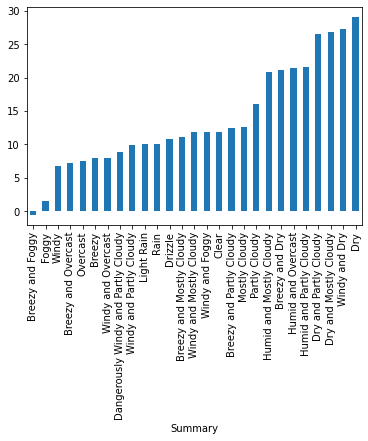

In [152]:
# Example : SELECT AVG(Temperature) FROM Weather GROUP BY Summary;
group_data = data.groupby('Summary').mean().sort_values('Temperature (C)')['Temperature (C)']
group_data.plot(kind='bar')

# Data Manipulation (DML)

### 1. Column insertion

In [74]:
# Example : Convert Celcius degree to Fahrenheit
data['Temperature (F)'] = data['Temperature (C)'] * 9/5 + 32

data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature (F)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,49.05
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,48.84
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,48.88
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,46.92
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,47.76


### 2. Handling missing data

In [75]:
# Show the rows with missing data
rows_w_missing_val = data['Precip Type'].isnull()
num_missing = len(data[rows_w_missing_val])
total_rows = len(data)

print(f'{num_missing/total_rows * 100:.2f}% of rows with missing data')
data[rows_w_missing_val].head(5)

0.54% of rows with missing data


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature (F)
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.,66.23
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.,64.13
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.,61.38
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.,54.62
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.,55.27


In [76]:
# Example : Replace missing values with the most frequent value

# 1. Get the most frequent values
most_frequent = data['Precip Type'].mode().values[0]

# 2. Replace the NaN values with the mode
data['Precip Type'] = data['Precip Type'].fillna(most_frequent)

# 3. Display the result
data[rows_w_missing_val].head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature (F)
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,rain,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.,66.23
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,rain,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.,64.13
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,rain,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.,61.38
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,rain,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.,54.62
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,rain,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.,55.27


In [85]:
# Backfill and Forefill

# Backfill : Find the next valid observation to fill gap
data = pd.read_csv('../datasets/weather.csv', header=0) # Reverse data to original state
data['Precip Type'] = data['Precip Type'].fillna(method='bfill')
data[rows_w_missing_val].head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,rain,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,snow,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,snow,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,rain,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,rain,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.


In [86]:
# Forefill : Find the last valid observation to fill gap
data = pd.read_csv('../datasets/weather.csv', header=0) # Reverse data to original state
data['Precip Type'] = data['Precip Type'].fillna(method='ffill')
data[rows_w_missing_val].head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,snow,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,rain,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,rain,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,snow,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,snow,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.


### 3. Delete columns

In [87]:
# Remember, for dropping column, always put axis=1. Axis=0 will work with rows
# inplace=True will make the change reflect in the dataframe
data.drop('Apparent Temperature (C)', inplace=True, axis=1)
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [88]:
# Dropping row example
data.drop(0, axis=0).head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.


# Basic data visualization

## Representing data's distribution

### 1. Histogram

<AxesSubplot:>

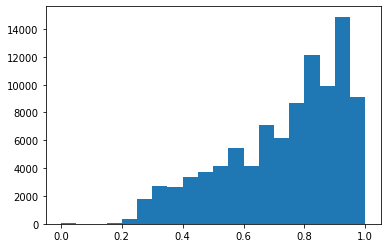

In [118]:
column_name = 'Humidity'
data[column_name].hist(bins=20, grid=False)

### 2. Density plots

<AxesSubplot:ylabel='Density'>

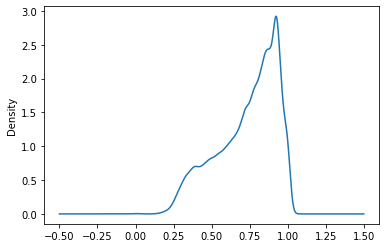

In [119]:
# Difference from histogram :
    # Histogram shows the frequencies of values
    # Density plot shows the probability density
data[column_name].plot(kind='density', grid=False)

### 3. Descriptive stats of a distribution

In [120]:
# 1. Skewness of distribution - third standardized moment
values = data[column_name]
skewness = skew(values)
print(f'SKEWNESS OF {column_name} IS {skewness}')

SKEWNESS OF Humidity IS -0.7158692944201595


In [121]:
# 2. Kurtosis of distribution - fourth standardized moment
    # A low or negative kurtosis indicates that in a period-to-period observation
    # most values fall within the predictable band. Hence, little risk
kurt = kurtosis(values) # or moment(values, 4) / (values.std() ** 4) - 3
print(f'KURTOSIS OF {column_name} IS {kurt}')

KURTOSIS OF Humidity IS -0.4622081953906778


## Representing variables' relationships

COEFFICIENT OF CORRELATION : 0.008956968343701379


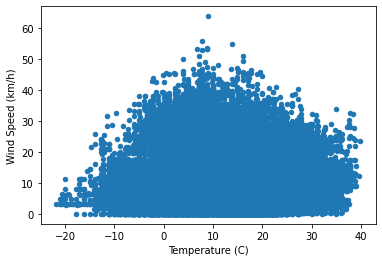

In [141]:
col1 = 'Temperature (C)'
col2 = 'Wind Speed (km/h)' # 'Humidity'

data.plot(kind='scatter', x=col1, y=col2)
corr = np.corrcoef(data[col1], data[col2])[0, 1]

print(f'COEFFICIENT OF CORRELATION : {corr}')

## Box plots

<AxesSubplot:>

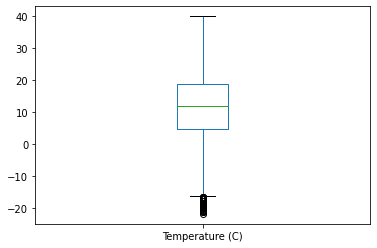

In [144]:
# Box plot :
    # The two boundaries of the boxes represents the first and third quartiles (Q1, Q3)
    # Inter-quartile range is IQR = Q3 - Q1
    # The two whiskers :
        # Lower whisker = Q1 - 1.5 * IQR
        # Upper whisker = Q3 + 1.5 * IQR
    # Any values outside of these whiskers are outliers
data['Temperature (C)'].plot(kind='box')